# Visualisation

A main challenge with big data is to report the results. Visualisation is a very important part of it. We have seen some simple plotting examples in python. In this tutorial we will focus on how to produce better plots.

Libraries used:
- pandas
- matplotlib
- seaborn

We will be using the following dataset:
- iris
- boston

A good resource for visualisation ideas in python can be found here: https://python-graph-gallery.com/

## Plotting libraries

We have already seen `matplotlib` which is the most basic library. There exists many python libraries for visualisation. Here we will focus on `seaborn` which is a commonly used library.

A good cheat sheet for this libary can be found here: https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_Seaborn_Cheat_Sheet.pdf

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
%matplotlib  inline
from sklearn import preprocessing

In [2]:
data=datasets.load_boston()
boston=pd.DataFrame(data['data'],columns=data.feature_names)
boston["price"]=data.target   # save price as another column in the dataset
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [3]:
data=datasets.load_iris()
iris=pd.DataFrame(data['data'],columns=['sepal.length','sepal.width','petal.length','petal.width'])
iris["species"]=data.target_names[data.target]   # save species as another column in the dataset
iris.head()

,sepal.length,sepal.width,petal.length,petal.width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


 ## Scatterplot
 
 Scatterplot are plots representing two variables, with each dot representing a sample
 
 With matplotlib:

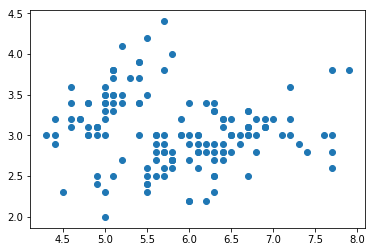

In [4]:
plt.scatter('sepal.length','sepal.width',data=iris)



With `seaborn`, the `lmplot` function plots a line through it

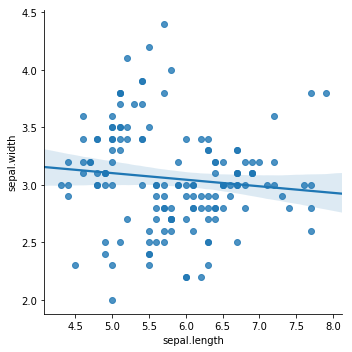

In [5]:
sns.lmplot('sepal.length','sepal.width',data=iris)

Let's make more information appear on these plots. For each plant, we know the species (stored in data.target).

In matplotlib, you can use the `c` argument to indicate a value that will set the  color.

Text(0.5,1,'Iris sepal')

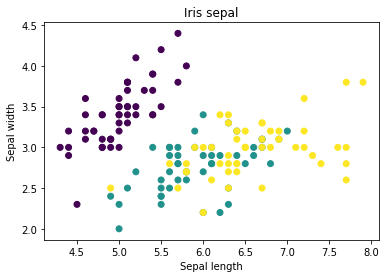

In [6]:
plt.scatter('sepal.length','sepal.width',data=iris,c=data.target)
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.title("Iris sepal")
#plt.legend(labels=data.target_names,c=[0,1,2])

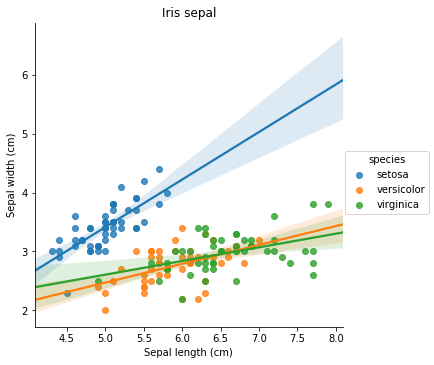

In [7]:
g=sns.lmplot('sepal.length','sepal.width',data=iris,hue="species")
g.set_axis_labels("Sepal length (cm)","Sepal width (cm)")
plt.title("Iris sepal")
plt.show(g)

Describe the plot above

*Write your answer here*

Reproduce similar plots with petal lenght and petal width

## Saving a plot

To save any python plot, simply use the `savefig` function:

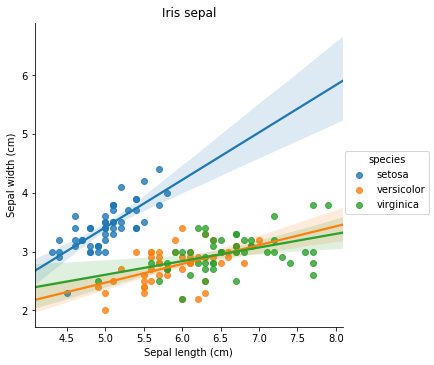

In [8]:
g=sns.lmplot('sepal.length','sepal.width',data=iris,hue="species")
g.set_axis_labels("Sepal length (cm)","Sepal width (cm)")
plt.title("Iris sepal")
plt.show(g)
plt.savefig("sepal.png")

## Distribution plots

### Boxplot

Boxplots represents the median (middle line), the first and third quartile of the data (25 and 75 percentile), as well as the extremes and outliers. Outliers are represented by dots.


The distribution of sepal length:

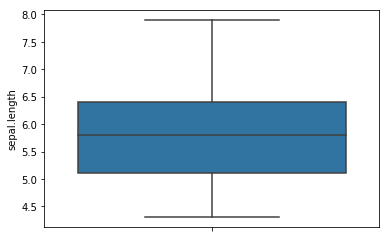

In [9]:
sns.boxplot( y=iris["sepal.length"] )

The distribution of sepal length by species

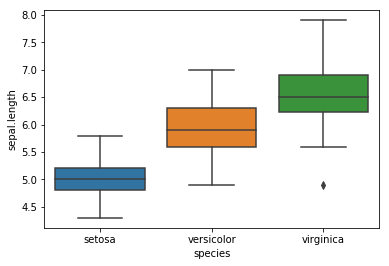

In [10]:
sns.boxplot( x=iris["species"], y=iris["sepal.length"] )

Reproduce this boxplot for petal length:

The distribution of all four variables

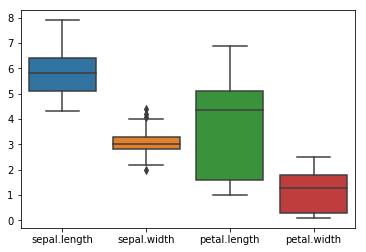

In [11]:
sns.boxplot(data=iris.iloc[:,0:4])

Reproduce this boxplot for only petal length and width:

**Boxplots are great for comparing distributions.**

### Histogram

Histogram represent the distribution of the data 2 dimension, which give a bit more details about the shape of the distribution (normality, skewness)

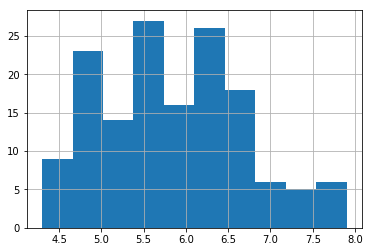

In [12]:
iris["sepal.length"].hist() # this function is from the pandas library

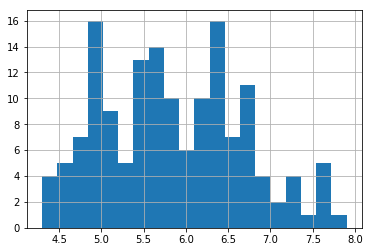

In [13]:
iris["sepal.length"].hist(bins=20) # more bins = more "bars"

Seaborn offers the possibility to draw the distribution curve on top of the histogram

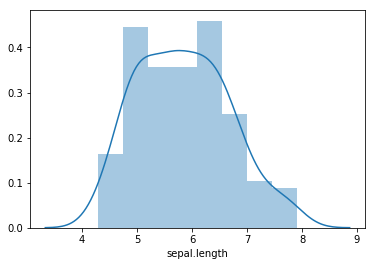

In [14]:
sns.distplot(iris["sepal.length"])

You can also plot two distributions on the same graph:

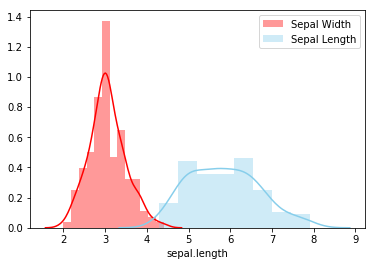

In [15]:
sns.distplot( iris["sepal.width"] , color="red", label="Sepal Width")
sns.distplot( iris["sepal.length"] , color="skyblue", label="Sepal Length")
plt.legend()

Reproduce this histogram for petal length and width:

**Histogram are used to check the shape of distributions**

### 2D histogram

You can plot histogram of the occurence of two variables together with 2 D histograms

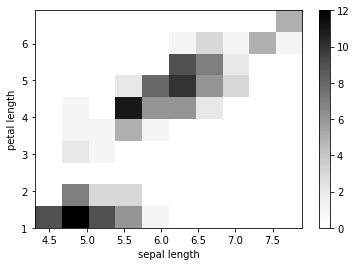

In [16]:
plt.hist2d(iris["sepal.length"],iris["petal.length"] , bins=(10, 10),cmap=plt.cm.Greys)
plt.xlabel("sepal length")
plt.ylabel("petal length")
plt.colorbar()


What do you observe?

*write your answer*

Do a 2D histogram of petal width and sepal width

### Violin plot

A mix of boxplor and histogram, violin plot shows the shape of distribution in the manner of a boxplot:b

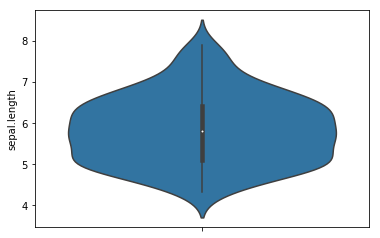

In [17]:
sns.violinplot( y=iris["sepal.length"] )

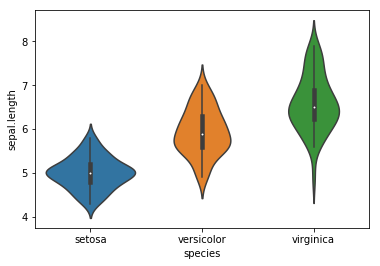

In [18]:
sns.violinplot( y=iris["sepal.length"] ,x=iris.species)

Reproduce these two graphs for petal length:

## Correlation

Heatmap are a coloured representation of tables. The color will match the value in each cell of the tables. 

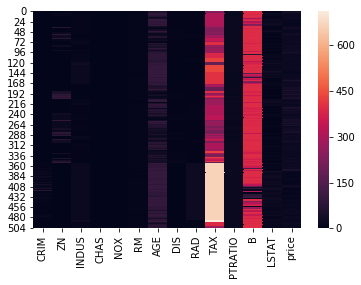

In [19]:
sns.heatmap(boston)

The heatmap above somewhat represent the entire boston dataset, but in this case it is not very useful, because onyly a couple of variables are visible, due to the diffence in scale.

In [20]:
boston_scaled=preprocessing.scale(boston)

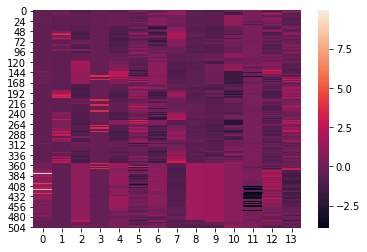

In [21]:
sns.heatmap(boston_scaled)

Now we see all the variables

Heatmap are especially useful for representing correlation tables. Indeed the correlation between all teh boston variables is 

In [22]:
boston.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
CRIM,1.000000,-0.199458,0.404471,-0.055295,0.417521,-0.219940,0.350784,-0.377904,0.622029,0.579564,0.288250,-0.377365,0.452220,-0.385832
ZN,-0.199458,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.404471,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055295,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.417521,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219940,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.350784,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.377904,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.622029,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.579564,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


This is a big table, and it is hard to really see the information, instead let's  do a heatmap of it:

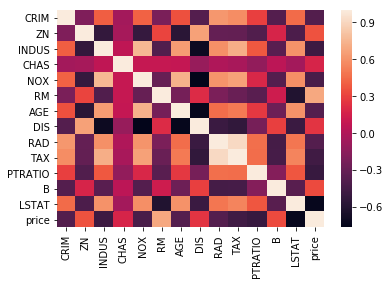

In [23]:
sns.heatmap(boston.corr())

Now we see more clearly the variables that are negatively correlated (in dark) and positively correlated (in light)

Produce a heat of the correlation for the iris dataset

## A bit more control on your plots

### The legend

Each instance that appears in the legend is defined by a new plot `plt.someplot` and a `label=` defined in that call

Example:

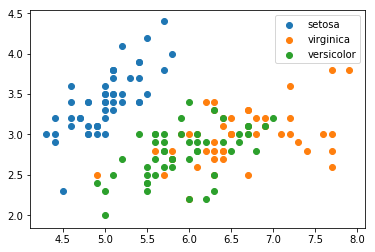

In [24]:
plt.scatter(iris['sepal.length'][iris.species=="setosa"],iris['sepal.width'][iris.species=="setosa"],label="setosa")
plt.scatter(iris['sepal.length'][iris.species=="virginica"],iris['sepal.width'][iris.species=="virginica"],label="virginica")
plt.scatter(iris['sepal.length'][iris.species=="versicolor"],iris['sepal.width'][iris.species=="versicolor"],label="versicolor")
plt.legend()

To add title and labels on axes use `plt.title` `plt.xlabel` and `plt.ylabel`
** You should always label your axes**

Text(0.5,1,'Iris dataset')

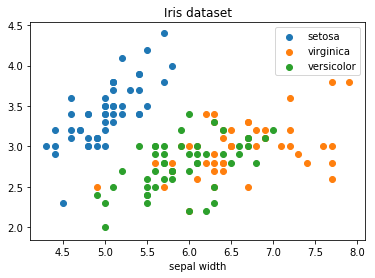

In [25]:
plt.scatter(iris['sepal.length'][iris.species=="setosa"],iris['sepal.width'][iris.species=="setosa"],label="setosa")
plt.scatter(iris['sepal.length'][iris.species=="virginica"],iris['sepal.width'][iris.species=="virginica"],label="virginica")
plt.scatter(iris['sepal.length'][iris.species=="versicolor"],iris['sepal.width'][iris.species=="versicolor"],label="versicolor")
plt.legend()
plt.xlabel("sepal length")
plt.xlabel("sepal width")
plt.title("Iris dataset")

### Colours

To change the colours of your graph, you need to change the *palette*, for this you can use the argument `cmap`. Unfortunately for scatterplot, that forces to change the way the command is written

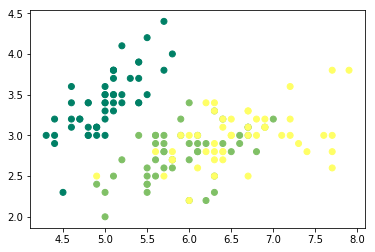

In [26]:
iris['species']=pd.Categorical(iris['species'])
iris['species'].cat.codes
plt.scatter(iris['sepal.length'],iris['sepal.width'],c=iris['species'].cat.codes,cmap="summer")


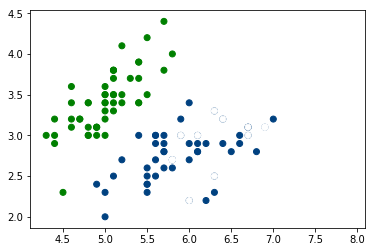

In [27]:
iris['species']=pd.Categorical(iris['species'])
iris['species'].cat.codes
plt.scatter(iris['sepal.length'],iris['sepal.width'],c=iris['species'].cat.codes,cmap="ocean")


See the effect on the heatmap:

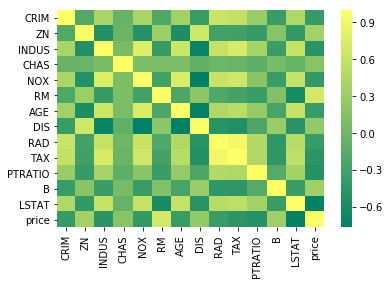

In [28]:
sns.heatmap(boston.corr(),cmap="summer")

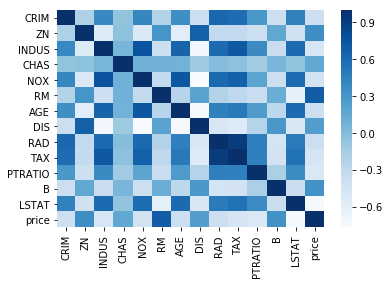

In [29]:
sns.heatmap(boston.corr(),cmap="Blues")

### Subplots

To plot several graph in the same figure, you can use `plt.subplot`. 
Here is an example with 4 plots:

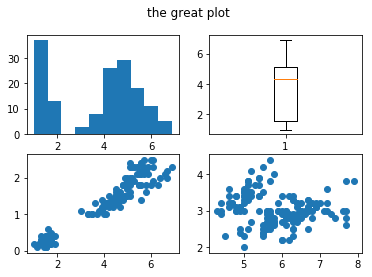

In [30]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
f.suptitle('the great plot')
ax1.hist(iris['petal.length' ])
ax2.boxplot(iris['petal.length'])
ax3.scatter(iris['petal.length'],iris['petal.width'])
ax4.scatter(iris['sepal.length'],iris['sepal.width'])

Each plot can be manipulated by its own handle, e.g. `ax1`:

[Text(0,0.5,'petal width'), Text(0.5,0,'sepal length')]

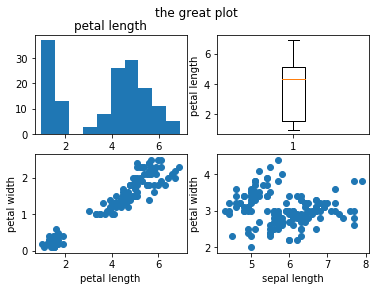

In [31]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
f.suptitle('the great plot')

ax1.hist(iris['petal.length' ])
ax1.set_title("petal length")

ax2.boxplot(iris['petal.length'])
ax2.set(ylabel="petal length")

ax3.scatter(iris['petal.length'],iris['petal.width'])
ax3.set(xlabel="petal length",ylabel="petal width")

ax4.scatter(iris['sepal.length'],iris['sepal.width'])
ax4.set(xlabel="sepal length",ylabel="petal width")


If you want to insert a seaborn plot as one of the subplot:

[Text(0,0.5,'petal width'), Text(0.5,0,'sepal length')]

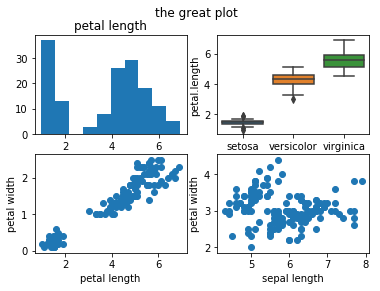

In [32]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
f.suptitle('the great plot')
ax1.hist(iris['petal.length' ])
ax1.set_title("petal length")

sns.boxplot(x=iris.species,y=iris['petal.length'],ax=ax2) ## the seaborn plot

ax3.scatter(iris['petal.length'],iris['petal.width'])
ax3.set(xlabel="petal length",ylabel="petal width")

ax4.scatter(iris['sepal.length'],iris['sepal.width'])
ax4.set(xlabel="sepal length",ylabel="petal width")


Create a 2 by 2 subplot with all the boxplot of the four variables in iris, colored by species

To tweak even more your matplotlib, see the following documentation: https://matplotlib.org/users/dflt_style_changes.html